This is a test notebook with statistics and numbers from a call between the two clients `0340b10c-cfe2-4604-a7e7-368a9326f84d` and `3a3e2b7b-c987-4049-8e96-584bb600a1da` in room `1234567890`.
roomId = "1234567890"
client1 = "0340b10c-cfe2-4604-a7e7-368a9326f84d"
client2 = "3a3e2b7b-c987-4049-8e96-584bb600a1da"

In [1]:
!pip install pymongo
!pip install pandas

import pandas as pd
import matplotlib.pyplot as plt

roomId = 5553563
roomId = 1456
roomId = 123444

Samples in call:  276
Earliest sample:  2022-11-15 08:39:13.326000
Latest sample:    2022-11-15 08:40:34.106000
Call duration:    0 days 00:01:20.780000
Samples from client  659a1c36-1f7c-4b32-8172-adc0a3b83179 :  135
Average roundTripTime:  count    20.000000
mean      0.014050
std       0.001877
min       0.011000
25%       0.013000
50%       0.014000
75%       0.014250
max       0.018000
Name: roundTripTime, dtype: float64
Average jitter:  count    20.000000
mean      0.018744
std       0.012469
min       0.012922
25%       0.014247
50%       0.014861
75%       0.015744
max       0.055056
Name: jitter, dtype: float64


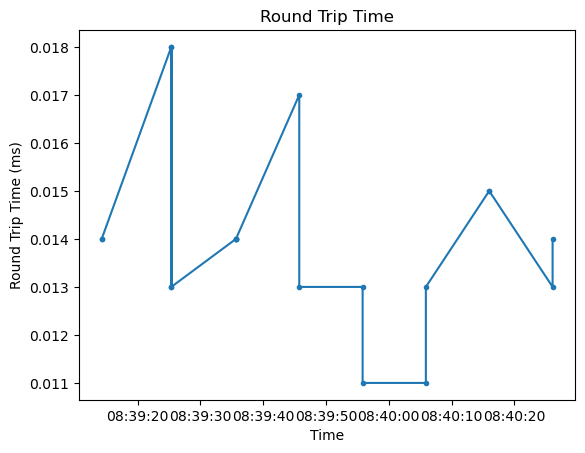

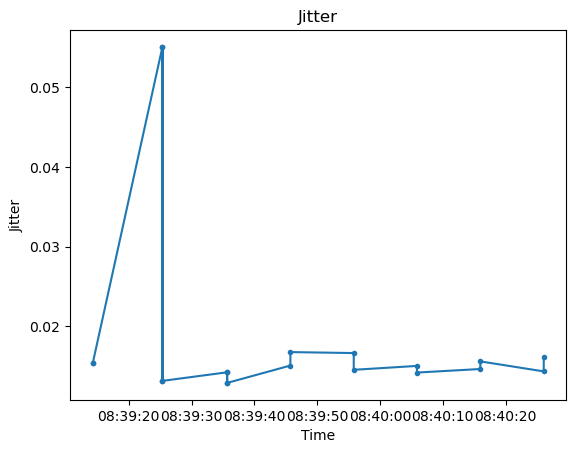

Samples from client  ff998d8e-fb3c-4498-9f2c-fdf867958dcb :  141
Average roundTripTime:  count    20.000000
mean      0.014300
std       0.004589
min       0.011000
25%       0.012000
50%       0.013000
75%       0.014000
max       0.031000
Name: roundTripTime, dtype: float64
Average jitter:  count    20.000000
mean      0.027206
std       0.019825
min       0.014322
25%       0.015436
50%       0.017333
75%       0.027622
max       0.069956
Name: jitter, dtype: float64


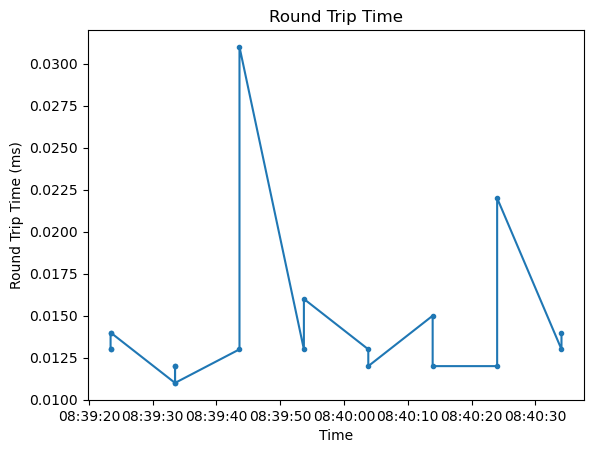

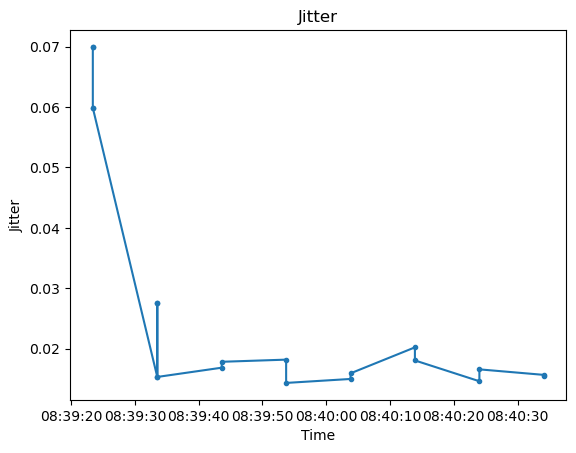

In [3]:

# read data into a DataFrame from rawData.csv
df = pd.read_csv('rawData.csv')

# drop rows where roomId is not 1234567890

df = df[df.roomId == roomId]

# extract the datetime from the timestamp
df['datetime'] = pd.to_datetime(df['timestamp'], unit='ms')

# print the first 5 rows
# print(df.head(5))


# print the count of rows in the dataframe
print("Samples in call: ", len(df))
#find the earliest and latest date
print("Earliest sample: ", df['datetime'].min().strftime('%Y-%m-%d %H:%M:%S.%f'))
print("Latest sample:   ", df['datetime'].max().strftime('%Y-%m-%d %H:%M:%S.%f'))

# find the duration of the call
print("Call duration:   ", df['datetime'].max() - df['datetime'].min())


for(clientId) in df['clientId'].unique():
  print("Samples from client ", clientId, ": ", len(df[df.clientId == clientId]))

  # crate a new data frame for each client
  clientDf = df[df.clientId == clientId]

  # sort the data frame by datetime
  clientDf = clientDf.sort_values(by=['datetime'])

  # print the first 5 rows
  # print(clientDf.head(5))

  # find the rows where the type is remoteInBound and kind is video
  remoteInBoundVideoDf = clientDf[(clientDf.type == 'remote-inbound-rtp') & (clientDf.kind == 'video')]

  # print the first 5 rows
  # print(remoteInBoundVideoDf.head(5))

  #in the remoteInBoundVideoDf find the mean of the roundTripTime
  print("Average roundTripTime: ", remoteInBoundVideoDf['roundTripTime'].describe())
  
  #in the remoteInBoundVideoDf find the mean of the jitter
  print("Average jitter: ", remoteInBoundVideoDf["jitter"].describe())

  # plot a time series of the roundTripTime with bullets

  plt.plot(remoteInBoundVideoDf['datetime'], remoteInBoundVideoDf['roundTripTime'], '.-')
  plt.title('Round Trip Time')
  plt.xlabel('Time')
  plt.ylabel('Round Trip Time (ms)')
  plt.show()

  plt.plot(remoteInBoundVideoDf['datetime'], remoteInBoundVideoDf['jitter'], '.-')
  plt.title('Jitter')
  plt.xlabel('Time')
  plt.ylabel('Jitter')
  plt.show()
